<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Milestone%20Projects/Milestone_Project_3_Bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-30 14:59:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-03-30 14:59:36 (112 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
dataset = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates = 
                      [ 'Date'],index_col = ['Date'])

In [4]:
dataset

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
dataset.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
len(dataset)

2787

In [8]:
bitcoin_prices = pd.DataFrame(dataset['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":"Price"})

In [9]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, '1 Oct 2018 to 18 May 2021')

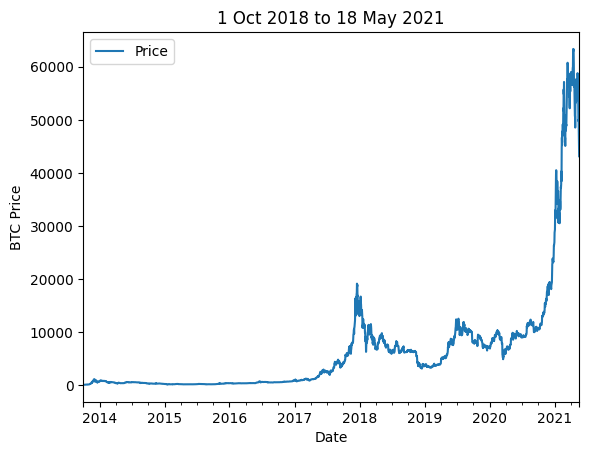

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("1 Oct 2018 to 18 May 2021")

<Axes: xlabel='Date'>

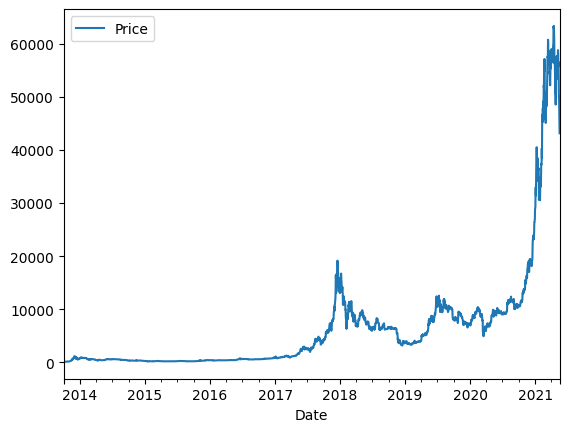

In [11]:
bitcoin_prices.plot()

### Importing with CSV Module

In [12]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
  reader = csv.reader(f,delimiter = ",")
  next(reader)
  for line in reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

In [13]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

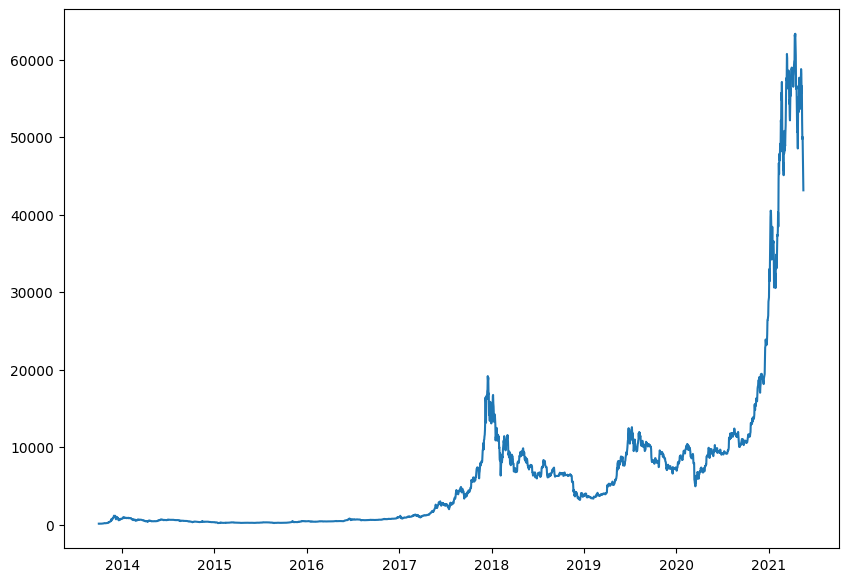

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)

### Creating train and test sets with time series data (Wrong Way)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [17]:
timesteps,prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(timesteps,prices,test_size = 0.2)

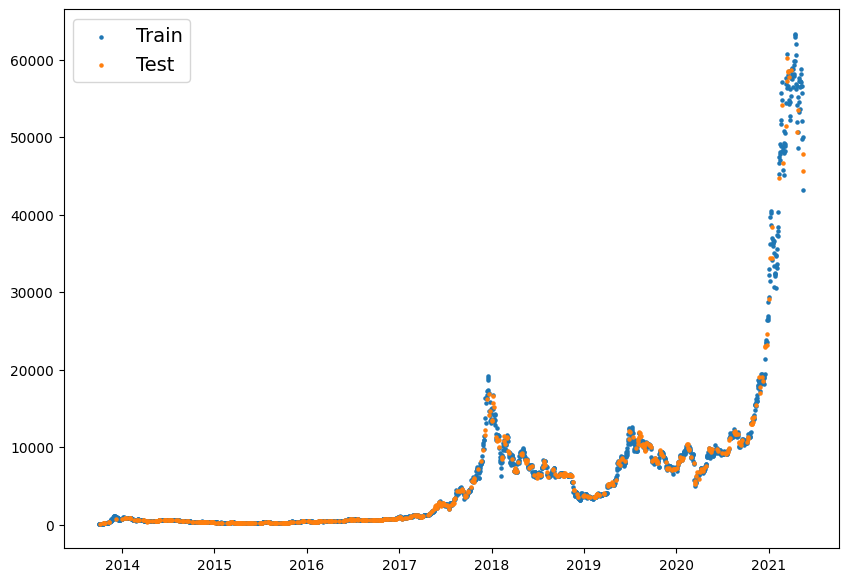

In [19]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating splits for time series (right way)

In [20]:
split_size = int(0.8*len(prices))
x_train,y_train = timesteps[:split_size],prices[:split_size]
x_test,y_test  = timesteps[split_size:],prices[split_size:]

In [21]:
len(x_train),len(x_test)

(2229, 558)

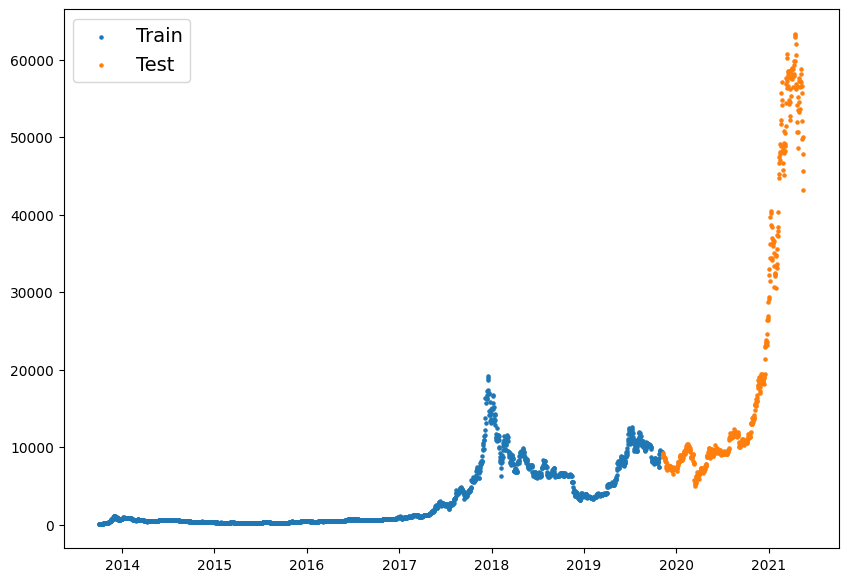

In [22]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating plot functions

In [23]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

## Model 0 - Naive Baselline

In [24]:
naive_forecast = y_test[:-1]

In [25]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [26]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

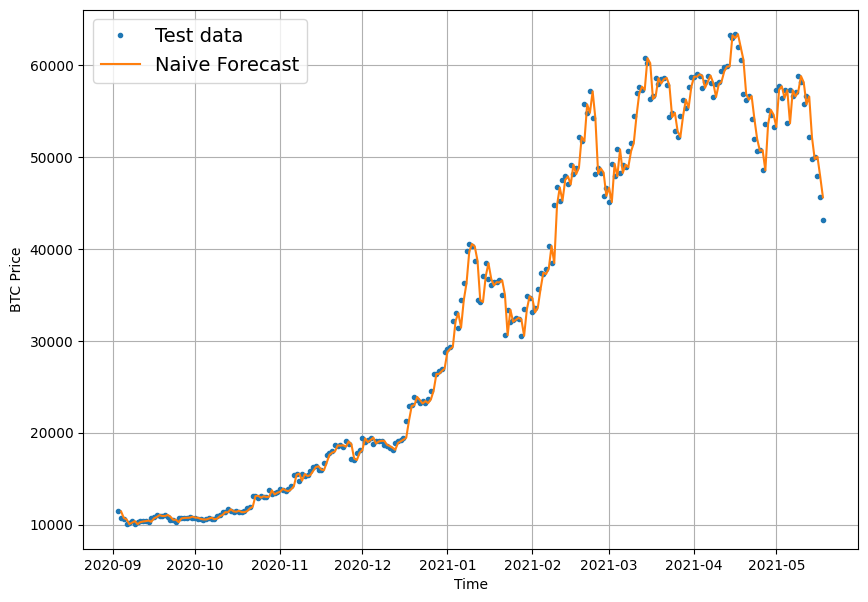

In [27]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive Forecast")

In [28]:
import tensorflow as tf

In [29]:
# MASE Implementation
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [30]:
mean_absolute_scaled_error(y_true = y_test[1:],y_pred = naive_forecast).numpy()

0.9995699939182624

In [31]:
def evaluation_metrics(y_pred,y_true):
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {"mae":mae.numpy(),"mse":mse.numpy(),"rmse":rmse.numpy(),"mape":mape.numpy(),"mase":mase.numpy()}


In [32]:
naive_results = evaluation_metrics(y_test[1:],naive_forecast)

In [33]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.527042,
 'mase': 1.0060278}

In [34]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [35]:
tf.reduce_min(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>

## Windowing dataset

In [36]:
HORIZON = 1 #Predict 1 Day
WINDOW = 7 #Use past week of Bitcoin data to one predictor


In [37]:
def get_labelled_window(x,horizon = HORIZON):
  '''
    Create Labels for windowed dataset.
    E.g. If Horizon = 1
    Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6] -> [7]) Window Size = 7
  '''
  return x[:,:-horizon],x[:,-horizon:]

In [38]:
test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))

In [39]:
tf.expand_dims(tf.range(8)+1,axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [40]:
print("Window : {x} -> Label: {y}".format(x = tf.squeeze(test_window).numpy(),y = tf.squeeze(test_label).numpy()))

Window : [1 2 3 4 5 6 7] -> Label: 8


## Preprocessing Functions for Windowed Data

In [41]:
import numpy as np

In [42]:
def make_windows(x,window_size =  WINDOW,horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)
  window_indexes = window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T
  windowed_array = x[window_indexes]
  
  windows,labels = get_labelled_window(windowed_array,horizon = HORIZON)
  return windows,labels

In [43]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW,horizon = HORIZON)

In [44]:
for i in range(3):
  print(full_windows[i],"->",full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


## Turning windows into Training and Test Sets

In [45]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [46]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

## Making modelling checkpoint

In [47]:
import os
def create_model_checkpoint(model_name,save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),verbose=0,save_best_only = True)

## Model 1 - Dense Model

In [48]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

In [49]:
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON,activation = "linear")
],name = "model_1_dense")

model_1.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [50]:
history_1 = model_1.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_1.name)]
)

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 843.9362 - mae: 843.9362    

18/18 [==============================] - 6s 48ms/step - loss: 791.0033 - mae: 791.0033 - val_loss: 1926.8289 - val_mae: 1926.8289
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 320.7019 - mae: 320.7019

18/18 [==============================] - 0s 27ms/step - loss: 257.1201 - mae: 257.1201 - val_loss: 1286.9941 - val_mae: 1286.9941
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 167.0621 - mae: 167.0621

18/18 [==============================] - 1s 36ms/step - loss: 208.6545 - mae: 208.6545 - val_loss: 1107.5428 - val_mae: 1107.5428
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 192.1343 - mae: 192.1343

18/18 [==============================] - 1s 37ms/step - loss: 190.3342 - mae: 190.3342 - val_loss: 1086.3320 - val_mae: 1086.3320
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 185.6160 - mae: 185.6160

18/18 [==============================] - 1s 48ms/step - loss: 179.1725 - mae: 179.1725 - val_loss: 970.3718 - val_mae: 970.3718
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 175.3097 - mae: 175.3097

18/18 [==============================] - 1s 48ms/step - loss: 177.4585 - mae: 177.4585 - val_loss: 960.6749 - val_mae: 960.6749
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 173.0046 - mae: 173.0046

18/18 [==============================] - 1s 53ms/step - loss: 166.7311 - mae: 166.7311 - val_loss: 897.2631 - val_mae: 897.2631
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 159.7466 - mae: 159.7466

18/18 [==============================] - 1s 48ms/step - loss: 161.9033 - mae: 161.9033 - val_loss: 872.0395 - val_mae: 872.0395
Epoch 9/100
 8/18 [============>.................] - ETA: 0s - loss: 162.1286 - mae: 162.1286

18/18 [==============================] - 1s 57ms/step - loss: 158.4636 - mae: 158.4636 - val_loss: 844.3036 - val_mae: 844.3036
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 145.8198 - mae: 145.8198

18/18 [==============================] - 1s 53ms/step - loss: 150.9355 - mae: 150.9355 - val_loss: 798.7590 - val_mae: 798.7590
Epoch 11/100
18/18 [==============================] - 0s 13ms/step - loss: 142.5627 - mae: 142.5627 - val_loss: 825.4495 - val_mae: 825.4495
Epoch 12/100
18/18 [==============================] - 0s 14ms/step - loss: 139.5331 - mae: 139.5331 - val_loss: 862.3917 - val_mae: 862.3917
Epoch 13/100
18/18 [==============================] - 0s 11ms/step - loss: 142.5225 - mae: 142.5225 - val_loss: 809.6069 - val_mae: 809.6069
Epoch 14/100
11/18 [=================>............] - ETA: 0s - loss: 127.9031 - mae: 127.9031

18/18 [==============================] - 1s 55ms/step - loss: 133.4985 - mae: 133.4985 - val_loss: 741.6373 - val_mae: 741.6373
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 134.6413 - mae: 134.6413

18/18 [==============================] - 1s 60ms/step - loss: 134.1306 - mae: 134.1306 - val_loss: 706.8759 - val_mae: 706.8759
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 126.7369 - mae: 126.7369

18/18 [==============================] - 2s 111ms/step - loss: 126.7369 - mae: 126.7369 - val_loss: 695.0231 - val_mae: 695.0231
Epoch 17/100
18/18 [==============================] - 0s 13ms/step - loss: 127.6829 - mae: 127.6829 - val_loss: 705.0356 - val_mae: 705.0356
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 128.6376 - mae: 128.6376

18/18 [==============================] - 1s 66ms/step - loss: 124.0950 - mae: 124.0950 - val_loss: 670.7101 - val_mae: 670.7101
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 125.2635 - mae: 125.2635 - val_loss: 707.0663 - val_mae: 707.0663
Epoch 20/100
10/18 [===============>..............] - ETA: 0s - loss: 126.5892 - mae: 126.5892

18/18 [==============================] - 1s 48ms/step - loss: 120.6326 - mae: 120.6326 - val_loss: 659.4214 - val_mae: 659.4214
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 123.4497 - mae: 123.4497

18/18 [==============================] - 1s 62ms/step - loss: 123.5221 - mae: 123.5221 - val_loss: 646.3176 - val_mae: 646.3176
Epoch 22/100
18/18 [==============================] - 0s 11ms/step - loss: 121.1541 - mae: 121.1541 - val_loss: 722.2468 - val_mae: 722.2468
Epoch 23/100
 9/18 [==============>...............] - ETA: 0s - loss: 126.3837 - mae: 126.3837

18/18 [==============================] - 2s 107ms/step - loss: 124.3452 - mae: 124.3452 - val_loss: 635.9790 - val_mae: 635.9790
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 122.8840 - mae: 122.8840

18/18 [==============================] - 1s 64ms/step - loss: 119.9217 - mae: 119.9217 - val_loss: 633.0659 - val_mae: 633.0659
Epoch 25/100
18/18 [==============================] - 0s 15ms/step - loss: 116.8794 - mae: 116.8794 - val_loss: 658.4049 - val_mae: 658.4049
Epoch 26/100
 9/18 [==============>...............] - ETA: 0s - loss: 117.3862 - mae: 117.3862

18/18 [==============================] - 1s 52ms/step - loss: 120.6084 - mae: 120.6084 - val_loss: 620.9566 - val_mae: 620.9566
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 123.6994 - mae: 123.6994

18/18 [==============================] - 1s 57ms/step - loss: 119.1913 - mae: 119.1913 - val_loss: 616.9828 - val_mae: 616.9828
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8814 - mae: 113.8814 - val_loss: 618.7308 - val_mae: 618.7308
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7500 - mae: 114.7500

18/18 [==============================] - 1s 49ms/step - loss: 115.2921 - mae: 115.2921 - val_loss: 614.6760 - val_mae: 614.6760
Epoch 30/100
11/18 [=================>............] - ETA: 0s - loss: 114.2905 - mae: 114.2905

18/18 [==============================] - 1s 81ms/step - loss: 118.8243 - mae: 118.8243 - val_loss: 607.7090 - val_mae: 607.7090
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 112.1725 - mae: 112.1725

18/18 [==============================] - 1s 58ms/step - loss: 115.8600 - mae: 115.8600 - val_loss: 606.7810 - val_mae: 606.7810
Epoch 32/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4467 - mae: 112.4467 - val_loss: 621.2513 - val_mae: 621.2513
Epoch 33/100
16/18 [=========================>....] - ETA: 0s - loss: 114.1102 - mae: 114.1102

18/18 [==============================] - 0s 28ms/step - loss: 112.2650 - mae: 112.2650 - val_loss: 605.2571 - val_mae: 605.2571
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 131.7969 - mae: 131.7969

18/18 [==============================] - 0s 25ms/step - loss: 112.1242 - mae: 112.1242 - val_loss: 596.4251 - val_mae: 596.4251
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8957 - mae: 110.8957 - val_loss: 596.4722 - val_mae: 596.4722
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 153.2364 - mae: 153.2364

18/18 [==============================] - 0s 26ms/step - loss: 116.9829 - mae: 116.9829 - val_loss: 591.7482 - val_mae: 591.7482
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5930 - mae: 111.5930 - val_loss: 605.0060 - val_mae: 605.0060
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7256 - mae: 112.7256 - val_loss: 606.5486 - val_mae: 606.5486
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 131.4040 - mae: 131.4040

18/18 [==============================] - 0s 26ms/step - loss: 111.9678 - mae: 111.9678 - val_loss: 586.7672 - val_mae: 586.7672
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7116 - mae: 109.7116 - val_loss: 587.2880 - val_mae: 587.2880
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 103.6591 - mae: 103.6591

18/18 [==============================] - 0s 26ms/step - loss: 109.4875 - mae: 109.4875 - val_loss: 583.8333 - val_mae: 583.8333
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 119.6900 - mae: 119.6900 - val_loss: 615.9404 - val_mae: 615.9404
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 116.4986 - mae: 116.4986 - val_loss: 675.9244 - val_mae: 675.9244
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 77.2404 - mae: 77.2404

18/18 [==============================] - 0s 26ms/step - loss: 115.4944 - mae: 115.4944 - val_loss: 583.6829 - val_mae: 583.6829
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4983 - mae: 109.4983 - val_loss: 596.6696 - val_mae: 596.6696
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 86.1461 - mae: 86.1461

18/18 [==============================] - 0s 26ms/step - loss: 110.5956 - mae: 110.5956 - val_loss: 578.8708 - val_mae: 578.8708
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6646 - mae: 109.6646 - val_loss: 592.7471 - val_mae: 592.7471
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7862 - mae: 109.7862 - val_loss: 614.9449 - val_mae: 614.9449
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3044 - mae: 113.3044 - val_loss: 643.9576 - val_mae: 643.9576
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3793 - mae: 117.3793 - val_loss: 653.0754 - val_mae: 653.0754
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9696 - mae: 112.9696 - val_loss: 606.8181 - val_mae: 606.8181
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1307 - mae: 114.1307 - val_loss: 602.2783 - val_mae: 602.2783
Epoch 53/100
18/18 [============

18/18 [==============================] - 0s 26ms/step - loss: 109.3713 - mae: 109.3713 - val_loss: 576.5079 - val_mae: 576.5079
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 107.6674 - mae: 107.6674 - val_loss: 720.3449 - val_mae: 720.3449
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4430 - mae: 112.4430 - val_loss: 591.2603 - val_mae: 591.2603
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 97.4333 - mae: 97.4333

18/18 [==============================] - 0s 26ms/step - loss: 107.9193 - mae: 107.9193 - val_loss: 572.3265 - val_mae: 572.3265
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3507 - mae: 107.3507 - val_loss: 603.8414 - val_mae: 603.8414
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7784 - mae: 111.7784 - val_loss: 601.7693 - val_mae: 601.7693
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5312 - mae: 108.5312 - val_loss: 600.1887 - val_mae: 600.1887
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0103 - mae: 110.0103 - val_loss: 587.6599 - val_mae: 587.6599
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 113.9477 - mae: 113.9477 - val_loss: 637.5427 - val_mae: 637.5427
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3960 - mae: 111.3960 - val_loss: 609.7830 - val_mae: 609.7830
Epoch 65/100
18/18 [============

18/18 [==============================] - 1s 41ms/step - loss: 108.3224 - mae: 108.3224 - val_loss: 570.4124 - val_mae: 570.4124
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3334 - mae: 106.3334 - val_loss: 622.0635 - val_mae: 622.0635
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7953 - mae: 106.7953 - val_loss: 574.1815 - val_mae: 574.1815
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2991 - mae: 109.2991 - val_loss: 632.5588 - val_mae: 632.5588
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 118.5069 - mae: 118.5069 - val_loss: 698.2356 - val_mae: 698.2356
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4451 - mae: 109.4451 - val_loss: 584.7944 - val_mae: 584.7944
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3702 - mae: 113.3702 - val_loss: 596.2396 - val_mae: 596.2396
Epoch 73/100
18/18 [============

18/18 [==============================] - 0s 26ms/step - loss: 109.0771 - mae: 109.0771 - val_loss: 566.3822 - val_mae: 566.3822
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6198 - mae: 109.6198 - val_loss: 569.6446 - val_mae: 569.6446
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4362 - mae: 109.4362 - val_loss: 566.5847 - val_mae: 566.5847
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0693 - mae: 110.0693 - val_loss: 580.7327 - val_mae: 580.7327
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0141 - mae: 108.0141 - val_loss: 582.3998 - val_mae: 582.3998
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7048 - mae: 109.7048 - val_loss: 618.7874 - val_mae: 618.7874
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 100.5547 - mae: 100.5547

18/18 [==============================] - 0s 27ms/step - loss: 108.6891 - mae: 108.6891 - val_loss: 566.1565 - val_mae: 566.1565
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 118.3838 - mae: 118.3838 - val_loss: 573.6157 - val_mae: 573.6157
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2731 - mae: 116.2731 - val_loss: 703.4388 - val_mae: 703.4388
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1233 - mae: 116.1233 - val_loss: 567.0164 - val_mae: 567.0164
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5373 - mae: 107.5373 - val_loss: 577.6509 - val_mae: 577.6509
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 108.5354 - mae: 108.5354 - val_loss: 566.6996 - val_mae: 566.6996
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7095 - mae: 106.7095 - val_loss: 610.1744 - val_mae: 610.1744
Epoch 88/100
18/18 [============

18/18 [==============================] - 1s 39ms/step - loss: 110.1091 - mae: 110.1091 - val_loss: 565.6059 - val_mae: 565.6059
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7287 - mae: 110.7287 - val_loss: 664.1573 - val_mae: 664.1573
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 121.9530 - mae: 121.9530 - val_loss: 604.8044 - val_mae: 604.8044
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 114.0523 - mae: 114.0523 - val_loss: 593.0909 - val_mae: 593.0909
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 104.9043 - mae: 104.9043

18/18 [==============================] - 1s 38ms/step - loss: 106.7601 - mae: 106.7601 - val_loss: 565.3785 - val_mae: 565.3785
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 106.4009 - mae: 106.4009 - val_loss: 578.2665 - val_mae: 578.2665
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 105.6307 - mae: 105.6307 - val_loss: 611.2604 - val_mae: 611.2604
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2504 - mae: 111.2504 - val_loss: 570.7443 - val_mae: 570.7443
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 151.7943 - mae: 151.7943

18/18 [==============================] - 0s 26ms/step - loss: 107.4003 - mae: 107.4003 - val_loss: 565.2089 - val_mae: 565.2089
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3370 - mae: 107.3370 - val_loss: 568.2571 - val_mae: 568.2571


In [51]:
model_1_results = model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.2571 - mae: 568.2571


In [52]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [53]:
model_1_preds = make_preds(model_1,test_windows)

18/18 [==============================] - 0s 1ms/step


In [54]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_1_preds)

{'mae': 568.25714,
 'mse': 1169134.8,
 'rmse': 1081.2654,
 'mape': 2.5395067,
 'mase': 0.9982704}

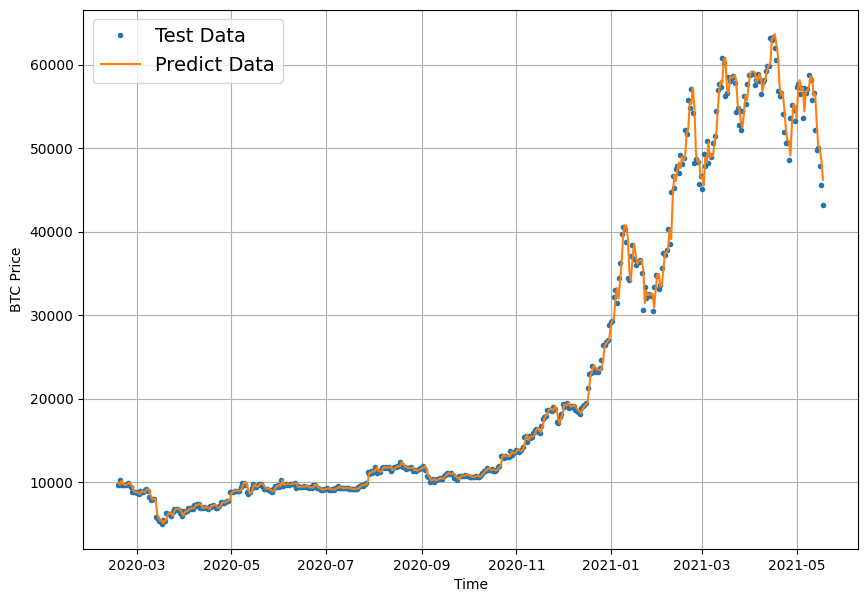

In [55]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_1_preds,start = offset,label = "Predict Data",format = "-")

## Model 2: Dense(Window = 30,Horizon = 1)

In [56]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 1)

In [57]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [58]:
model_2 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(1,activation = "linear"),
],name = "model_2_dense")
model_2.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [59]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 2201.3828 - mae: 2201.3828

18/18 [==============================] - 1s 33ms/step - loss: 883.9979 - mae: 883.9979 - val_loss: 2062.7749 - val_mae: 2062.7749
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 423.5042 - mae: 423.5042 - val_loss: 2317.2710 - val_mae: 2317.2710
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 317.9407 - mae: 317.9407

18/18 [==============================] - 0s 26ms/step - loss: 258.1025 - mae: 258.1025 - val_loss: 1105.2645 - val_mae: 1105.2645
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 167.2178 - mae: 167.2178

18/18 [==============================] - 0s 26ms/step - loss: 201.3897 - mae: 201.3897 - val_loss: 1026.3274 - val_mae: 1026.3274
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 158.0182 - mae: 158.0182

18/18 [==============================] - 1s 35ms/step - loss: 170.9887 - mae: 170.9887 - val_loss: 909.5745 - val_mae: 909.5745
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 172.4982 - mae: 172.4982 - val_loss: 1008.2348 - val_mae: 1008.2348
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 170.6217 - mae: 170.6217 - val_loss: 991.2373 - val_mae: 991.2373
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 161.3131 - mae: 161.3131

18/18 [==============================] - 1s 41ms/step - loss: 157.6977 - mae: 157.6977 - val_loss: 840.9297 - val_mae: 840.9297
Epoch 9/100
14/18 [======================>.......] - ETA: 0s - loss: 152.6913 - mae: 152.6913

18/18 [==============================] - 1s 38ms/step - loss: 151.7854 - mae: 151.7854 - val_loss: 827.1117 - val_mae: 827.1117
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 153.3786 - mae: 153.3786

18/18 [==============================] - 0s 26ms/step - loss: 150.7130 - mae: 150.7130 - val_loss: 799.3093 - val_mae: 799.3093
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 145.8038 - mae: 145.8038 - val_loss: 872.4202 - val_mae: 872.4202
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2146 - mae: 120.2146

18/18 [==============================] - 0s 26ms/step - loss: 146.9963 - mae: 146.9963 - val_loss: 781.6069 - val_mae: 781.6069
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 141.9501 - mae: 141.9501 - val_loss: 1152.0648 - val_mae: 1152.0648
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 160.1781 - mae: 160.1781 - val_loss: 980.5928 - val_mae: 980.5928
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 146.3162 - mae: 146.3162

18/18 [==============================] - 1s 44ms/step - loss: 146.3162 - mae: 146.3162 - val_loss: 761.6158 - val_mae: 761.6158
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 136.0814 - mae: 136.0814

18/18 [==============================] - 0s 28ms/step - loss: 160.7535 - mae: 160.7535 - val_loss: 751.1001 - val_mae: 751.1001
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 145.4244 - mae: 145.4244 - val_loss: 1112.4082 - val_mae: 1112.4082
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 155.3976 - mae: 155.3976 - val_loss: 929.8677 - val_mae: 929.8677
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 147.7603 - mae: 147.7603 - val_loss: 771.3430 - val_mae: 771.3430
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 162.3455 - mae: 162.3455 - val_loss: 1018.0272 - val_mae: 1018.0272
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 147.3680 - mae: 147.3680 - val_loss: 904.8817 - val_mae: 904.8817
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 151.1306 - mae: 151.1306

18/18 [==============================] - 1s 30ms/step - loss: 150.9616 - mae: 150.9616 - val_loss: 733.6430 - val_mae: 733.6430
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 137.2760 - mae: 137.2760 - val_loss: 834.7013 - val_mae: 834.7013
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 148.8065 - mae: 148.8065

18/18 [==============================] - 0s 28ms/step - loss: 138.2283 - mae: 138.2283 - val_loss: 716.5973 - val_mae: 716.5973
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 139.3274 - mae: 139.3274 - val_loss: 719.4267 - val_mae: 719.4267
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 139.1053 - mae: 139.1053 - val_loss: 724.3830 - val_mae: 724.3830
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 130.6105 - mae: 130.6105 - val_loss: 1169.4235 - val_mae: 1169.4235
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 188.3420 - mae: 188.3420

18/18 [==============================] - 0s 27ms/step - loss: 156.0146 - mae: 156.0146 - val_loss: 697.9909 - val_mae: 697.9909
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 131.5547 - mae: 131.5547 - val_loss: 777.3845 - val_mae: 777.3845
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 130.6750 - mae: 130.6750 - val_loss: 704.5523 - val_mae: 704.5523
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5673 - mae: 127.5673

18/18 [==============================] - 0s 26ms/step - loss: 147.2315 - mae: 147.2315 - val_loss: 691.1550 - val_mae: 691.1550
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 152.9211 - mae: 152.9211 - val_loss: 1056.0009 - val_mae: 1056.0007
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 138.7738 - mae: 138.7738 - val_loss: 784.2849 - val_mae: 784.2849
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 130.6702 - mae: 130.6702 - val_loss: 703.6149 - val_mae: 703.6149
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 129.3919 - mae: 129.3919 - val_loss: 742.2616 - val_mae: 742.2616
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 132.4689 - mae: 132.4689 - val_loss: 1137.0293 - val_mae: 1137.0293
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 156.6518 - mae: 156.6518 - val_loss: 770.1302 - val_mae: 770.1302
Epoch 38/100
18/18 [========

18/18 [==============================] - 0s 27ms/step - loss: 145.9762 - mae: 145.9762 - val_loss: 668.4926 - val_mae: 668.4926
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 106.8538 - mae: 106.8538

18/18 [==============================] - 0s 27ms/step - loss: 129.2701 - mae: 129.2701 - val_loss: 665.4744 - val_mae: 665.4744
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 140.8607 - mae: 140.8607 - val_loss: 716.8902 - val_mae: 716.8902
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 139.9996 - mae: 139.9996

18/18 [==============================] - 0s 27ms/step - loss: 125.6169 - mae: 125.6169 - val_loss: 665.2849 - val_mae: 665.2849
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4690 - mae: 128.4690 - val_loss: 680.5975 - val_mae: 680.5975
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2551 - mae: 125.2551 - val_loss: 671.4860 - val_mae: 671.4860
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 125.1049 - mae: 125.1049 - val_loss: 710.8674 - val_mae: 710.8674
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 129.7935 - mae: 129.7935 - val_loss: 669.7191 - val_mae: 669.7191
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 132.4608 - mae: 132.4608 - val_loss: 696.4745 - val_mae: 696.4745
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 132.7644 - mae: 132.7644 - val_loss: 672.1110 - val_mae: 672.1110
Epoch 52/100
 1/18 [>...........

18/18 [==============================] - 0s 26ms/step - loss: 125.0489 - mae: 125.0489 - val_loss: 648.9997 - val_mae: 648.9997
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 124.2874 - mae: 124.2874 - val_loss: 712.3459 - val_mae: 712.3459
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 137.6533 - mae: 137.6533 - val_loss: 882.2294 - val_mae: 882.2294
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 134.0086 - mae: 134.0086 - val_loss: 669.5267 - val_mae: 669.5267
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 130.1800 - mae: 130.1800 - val_loss: 764.2505 - val_mae: 764.2505
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 145.6974 - mae: 145.6974

18/18 [==============================] - 0s 27ms/step - loss: 131.2860 - mae: 131.2860 - val_loss: 644.4302 - val_mae: 644.4302
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 130.2393 - mae: 130.2393 - val_loss: 800.7713 - val_mae: 800.7713
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 182.2155 - mae: 182.2155 - val_loss: 666.4924 - val_mae: 666.4924
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 168.5662 - mae: 168.5662 - val_loss: 981.0007 - val_mae: 981.0007
Epoch 61/100
14/18 [======================>.......] - ETA: 0s - loss: 131.4666 - mae: 131.4666

18/18 [==============================] - 1s 39ms/step - loss: 130.7712 - mae: 130.7712 - val_loss: 640.8601 - val_mae: 640.8601
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 131.9592 - mae: 131.9592 - val_loss: 741.1514 - val_mae: 741.1514
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 129.6844 - mae: 129.6844 - val_loss: 759.7017 - val_mae: 759.7017
Epoch 64/100
16/18 [=========================>....] - ETA: 0s - loss: 119.5135 - mae: 119.5135

18/18 [==============================] - 1s 38ms/step - loss: 121.8312 - mae: 121.8312 - val_loss: 634.7806 - val_mae: 634.7806
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 120.2018 - mae: 120.2018 - val_loss: 642.0764 - val_mae: 642.0764
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 122.7905 - mae: 122.7905 - val_loss: 636.4766 - val_mae: 636.4766
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 118.0743 - mae: 118.0743 - val_loss: 637.6531 - val_mae: 637.6531
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 121.9425 - mae: 121.9425 - val_loss: 783.4306 - val_mae: 783.4306
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 134.8976 - mae: 134.8976 - val_loss: 836.0720 - val_mae: 836.0720
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 147.8996 - mae: 147.8996 - val_loss: 1226.0421 - val_mae: 1226.0421
Epoch 71/100
18/18 [==========

18/18 [==============================] - 0s 27ms/step - loss: 119.1732 - mae: 119.1732 - val_loss: 631.0102 - val_mae: 631.0102
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 133.5911 - mae: 133.5911 - val_loss: 660.3978 - val_mae: 660.3978
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1320 - mae: 142.1320

18/18 [==============================] - 0s 26ms/step - loss: 124.5227 - mae: 124.5227 - val_loss: 626.1862 - val_mae: 626.1862
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 117.0575 - mae: 117.0575 - val_loss: 799.9100 - val_mae: 799.9100
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 118.5245 - mae: 118.5245 - val_loss: 660.0884 - val_mae: 660.0884
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 127.2779 - mae: 127.2779 - val_loss: 863.3359 - val_mae: 863.3359
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 139.2993 - mae: 139.2993 - val_loss: 789.9581 - val_mae: 789.9581
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 122.0684 - mae: 122.0684 - val_loss: 695.6957 - val_mae: 695.6957
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 131.7129 - mae: 131.7129 - val_loss: 947.5646 - val_mae: 947.5646
Epoch 81/100
18/18 [============

18/18 [==============================] - 0s 26ms/step - loss: 127.1551 - mae: 127.1551 - val_loss: 624.8073 - val_mae: 624.8073
Epoch 83/100
 1/18 [>.............................] - ETA: 0s - loss: 88.6938 - mae: 88.6938

18/18 [==============================] - 0s 26ms/step - loss: 126.1866 - mae: 126.1866 - val_loss: 618.3471 - val_mae: 618.3471
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 123.7851 - mae: 123.7851 - val_loss: 675.9872 - val_mae: 675.9872
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 122.4346 - mae: 122.4346 - val_loss: 950.6833 - val_mae: 950.6833
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 125.2175 - mae: 125.2175 - val_loss: 620.0620 - val_mae: 620.0620
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8948 - mae: 123.8948 - val_loss: 620.1514 - val_mae: 620.1514
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2886 - mae: 114.2886 - val_loss: 620.3163 - val_mae: 620.3163
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5774 - mae: 114.5774 - val_loss: 827.8130 - val_mae: 827.8130
Epoch 90/100
18/18 [============

18/18 [==============================] - 0s 28ms/step - loss: 118.3522 - mae: 118.3522 - val_loss: 616.1591 - val_mae: 616.1591
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3404 - mae: 113.3404 - val_loss: 662.0051 - val_mae: 662.0051
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 141.8964 - mae: 141.8964 - val_loss: 764.6425 - val_mae: 764.6425
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 124.5000 - mae: 124.5000 - val_loss: 709.8279 - val_mae: 709.8279
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 131.9515 - mae: 131.9515 - val_loss: 869.9862 - val_mae: 869.9862
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 127.2542 - mae: 127.2542 - val_loss: 881.3244 - val_mae: 881.3244
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0648 - mae: 127.0648 - val_loss: 1125.3820 - val_mae: 1125.3820
Epoch 100/100
18/18 [=========

In [60]:
model_2_preds = make_preds(model_2,test_windows)

18/18 [==============================] - 0s 1ms/step


In [61]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_2_preds)

{'mae': 772.6634,
 'mse': 1704850.1,
 'rmse': 1305.6991,
 'mape': 3.7084713,
 'mase': 1.3506233}

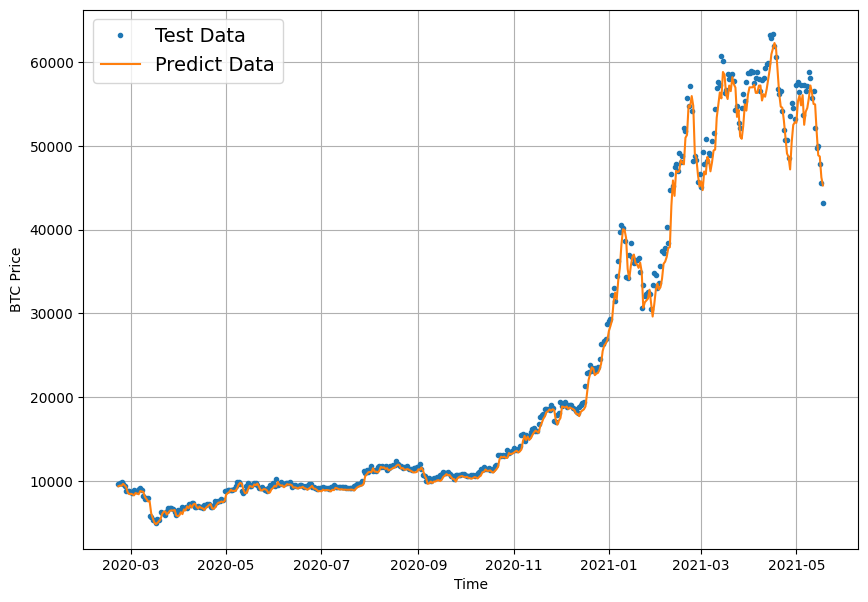

In [62]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_2_preds,start = offset,label = "Predict Data",format = "-")

## Model 3: Dense(Windows = 30,Horizon = 7)

In [63]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 7)

In [64]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [65]:

tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [66]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 603.4118


603.4118041992188

In [67]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [68]:
model_3_preds[:5]

array([[8765.398],
       [8701.984],
       [8635.102],
       [8281.151],
       [8416.416]], dtype=float32)

## Model 4: Conv1D

In [69]:
full_windows,full_labels = make_windows(prices,window_size = 7,horizon = 1)

In [70]:
len(full_windows),len(full_labels)

(2780, 2780)

In [71]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [72]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [73]:
model_4_results = model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 621.0995


In [74]:
model_4_results = evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred = model_4_results)

In [75]:
model_4_results

{'mae': 19475.268,
 'mse': 686482800.0,
 'rmse': 26200.816,
 'mape': 94.79044,
 'mase': 34.21265}

## Model 5: RNN(LSTM)

In [76]:
WINDOW_SIZE = 7
HORIZON  = 1

In [77]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x:tf.expand_dims(x,axis = 1))(inputs)
x = layers.LSTM(128,activation = "relu",return_sequences = True)(x)
x = layers.LSTM(128,activation = "relu")(x)
x = layers.Dense(32,activation = "relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs,outputs,name = "model_5_lstm")

In [78]:
model_5.compile(loss = "mae",optimizer = "adam")

In [79]:
model_5.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 7s 237ms/step - loss: 3038.9744 - val_loss: 18005.1797
Epoch 2/100
18/18 [==============================] - 3s 197ms/step - loss: 2237.9873 - val_loss: 7024.5869
Epoch 3/100
18/18 [==============================] - 3s 178ms/step - loss: 453.4304 - val_loss: 2219.8970
Epoch 4/100
18/18 [==============================] - 4s 230ms/step - loss: 252.6290 - val_loss: 1226.8734
Epoch 5/100
18/18 [==============================] - 3s 191ms/step - loss: 204.5573 - val_loss: 1128.4600
Epoch 6/100
18/18 [==============================] - 3s 175ms/step - loss: 194.2820 - val_loss: 1066.0771
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 189.9214 - val_loss: 1073.7366
Epoch 8/100
18/18 [==============================] - 4s 207ms/step - loss: 184.8606 - val_loss: 1026.6511
Epoch 9/100
18/18 [==============================] - 4s 215ms/step - loss: 180.6535 - val_loss: 1008.8939
Epoch 10/100
18/18 [========================

In [80]:
model_5_results = model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.0920


In [81]:
model_5_results = evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred = model_5_results)

In [82]:
model_5_results

{'mae': 19532.275,
 'mse': 688706500.0,
 'rmse': 26243.217,
 'mape': 95.2686,
 'mase': 34.312798}

## Make a Multi-Variate time series Data

In [85]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [83]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [84]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days
     

(1012, 2414)

In [87]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

In [88]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [96]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),index = bitcoin_prices_block.index,columns = bitcoin_prices_block.columns)

In [97]:
scaled_price_block_df

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0
...,...,...
2021-05-14,0.785214,0.0
2021-05-15,0.789461,0.0
2021-05-16,0.755509,0.0


<Axes: xlabel='Date'>

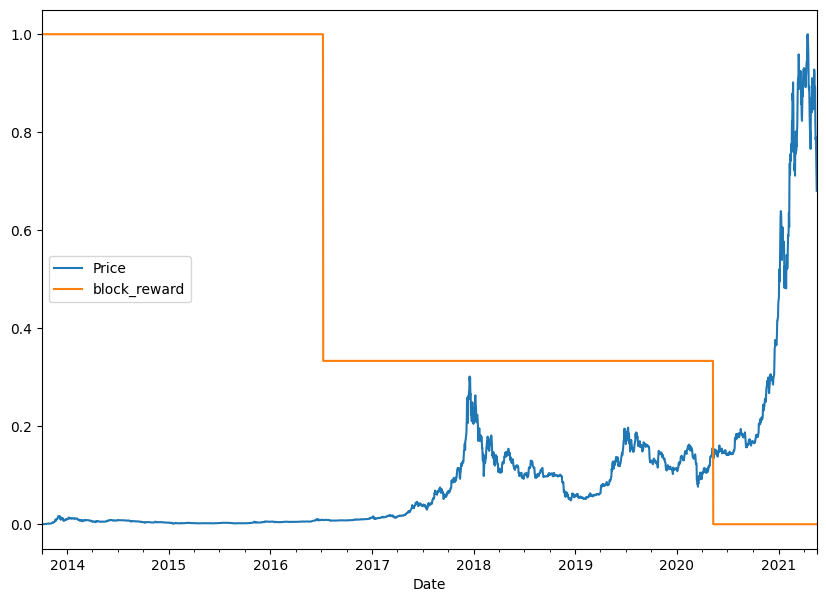

In [98]:
scaled_price_block_df.plot(figsize = (10,7))

In [99]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [101]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)  

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [103]:
x = bitcoin_prices_windowed.dropna().drop("Price",axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [106]:
split_size = int(len(x)*0.8)
x_train,y_train = x[:split_size],y[:split_size]
x_test,y_test = x[split_size:],y[split_size:]

In [114]:
model_6 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON,activation = "linear")
],name = "model_6_dense")

In [115]:
model_6.compile(loss = "mae",optimizer = "adam")

In [116]:
model_6.fit(x_train,
            y_train,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(x_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [117]:
model_6_results = model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 592.6894


In [118]:
model_6_preds = tf.squeeze(model_6.predict(x_test))

18/18 [==============================] - 0s 2ms/step


In [119]:
model_6_results = evaluation_metrics(y_true = y_test,y_pred = model_6_results)

In [120]:
model_6_results

{'mae': 19503.68,
 'mse': 687590200.0,
 'rmse': 26221.941,
 'mape': 95.028725,
 'mase': 34.26256}

## Model 7: N-Beats

In [126]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,input_size:int,theta_size:int,horizon:int,n_neurons:int,n_layers:int,**kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        self.hidden = [tf.keras.layers.Dense(n_neurons,activation = "relu") for _ in range(n_layers)]
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation = "linear",name = "theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [127]:

# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)
     

In [128]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [129]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.6092185   0.6688063  -0.07655255  0.05991614  0.614193   -0.27134246
 -0.7291335 ]
Forecast: 0.21214279532432556


## Preparing data for N-Beats Algorithm

In [131]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [132]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [134]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [137]:
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))


In [138]:
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [140]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE*HORIZON
THETA_SIZE = INPUT_SIZE+HORIZON

### Residual Connections

In [141]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1,tensor_2])

added = layers.add([tensor_1,tensor_2])

### Modelling

In [151]:
tf.random.set_seed(42)
#Initial Block
nbeats_block_layer = NBeatsBlock(
    INPUT_SIZE,
    THETA_SIZE,
    HORIZON,
    N_NEURONS,
    N_LAYERS,name = "InitialBlock"
    )
#Input Stack
stack_input = layers.Input(shape = (INPUT_SIZE),name = "stack_input")
#Initial backcast and forecast
backcast,forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 
#Stack of Blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")
# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 259: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 359: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


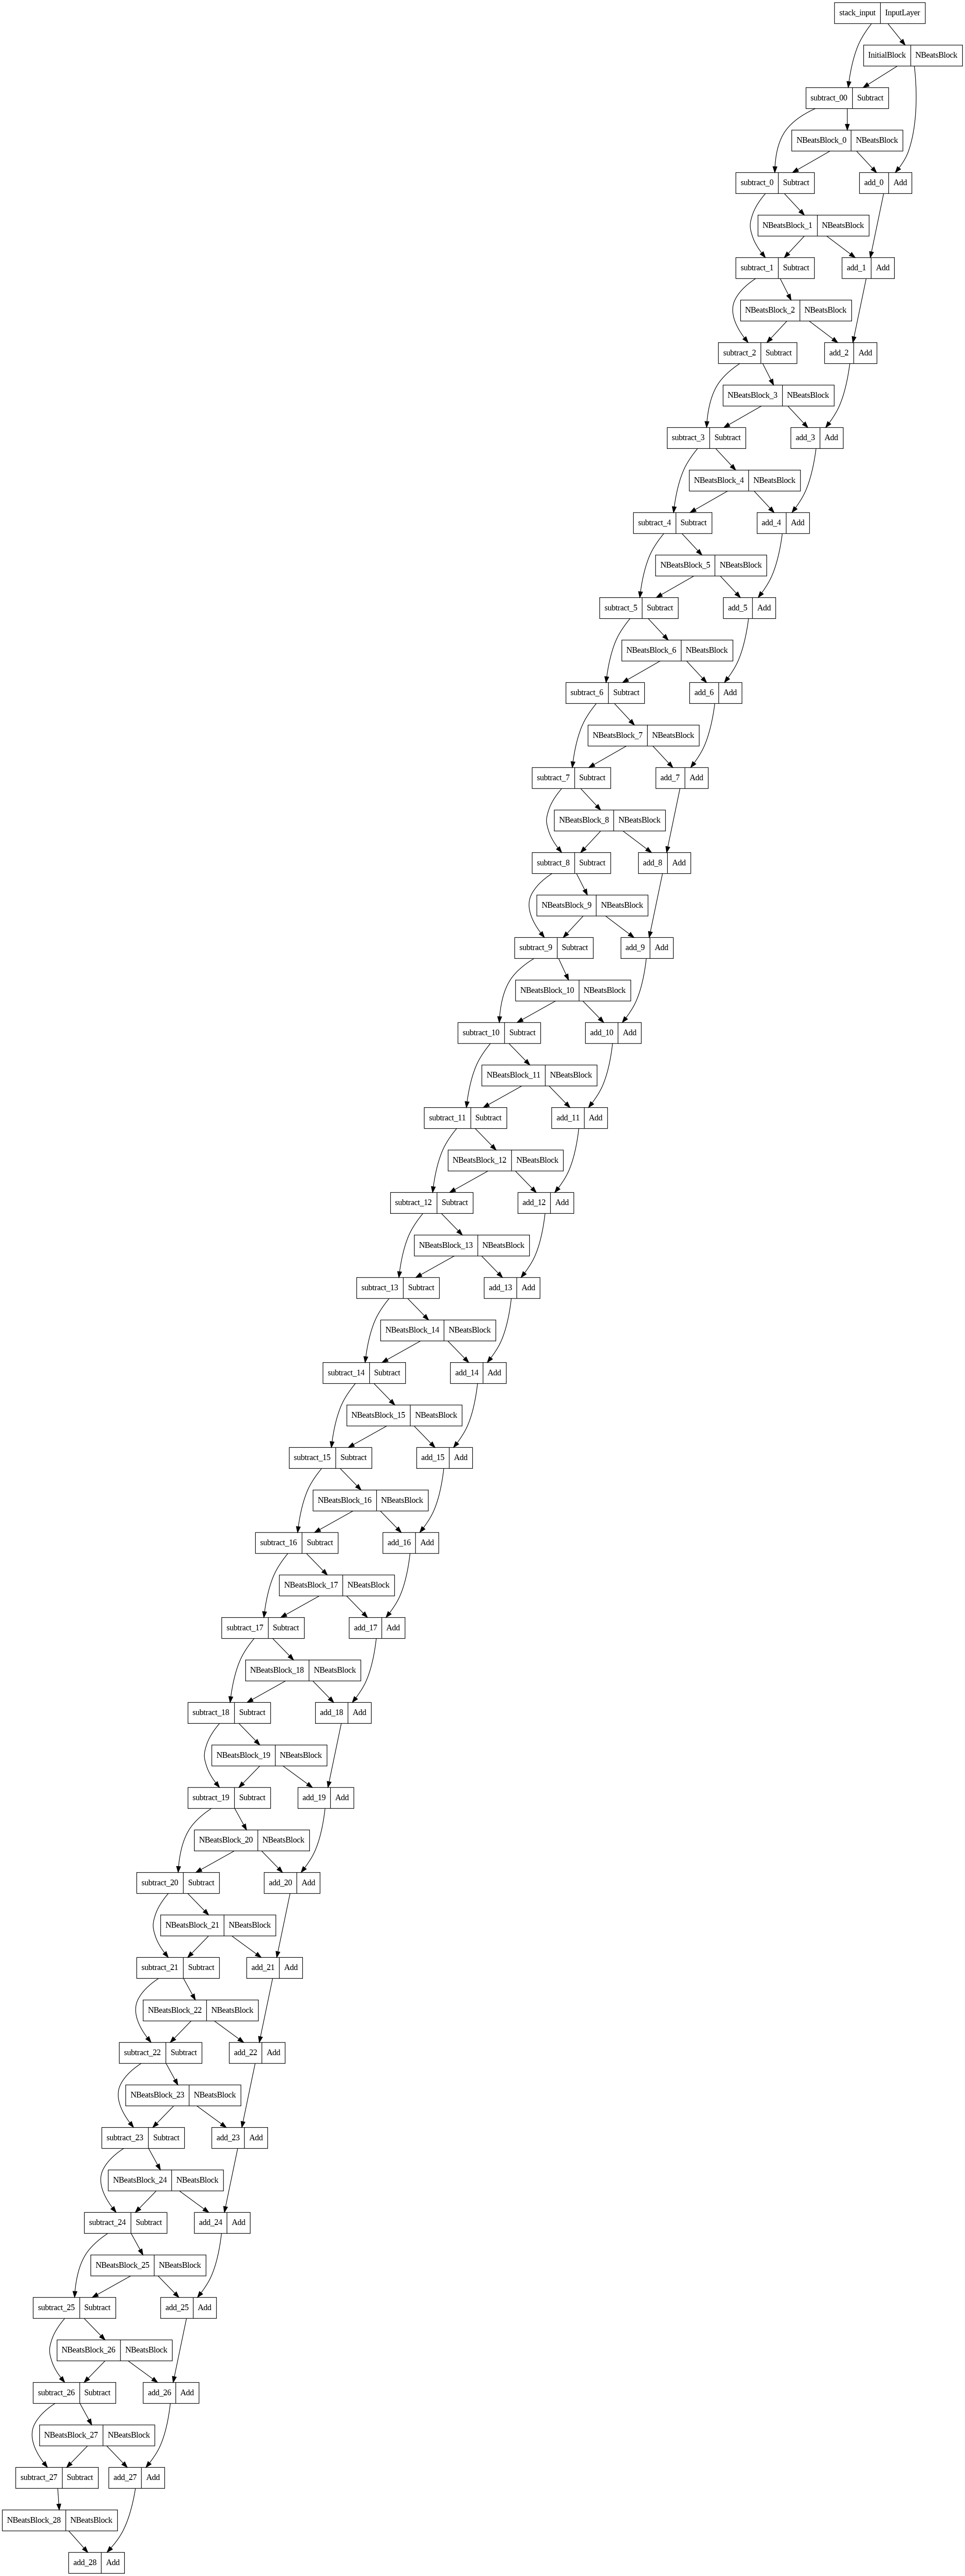

In [152]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)